In [48]:
# JUst a start; review and resvise, adding more features and descriptions.

# MLPClassifier with Scikit-Learn

This notebook demonstrates how to use the `MLPClassifier` from `scikit-learn` for classification and regression.

---

## 1. Import Libraries and Generate Data

We start by importing necessary libraries and generating a synthetic dataset using `make_moons`. This dataset is useful for illustrating non-linear decision boundaries.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


## Moons Dataset Revisited

In [50]:
# Generate synthetic dataset (moons)
X, y = make_moons(n_samples = 10000, noise = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split into validation data
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [51]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (7000, 2)
X_val shape: (1500, 2)
X_test shape: (1500, 2)


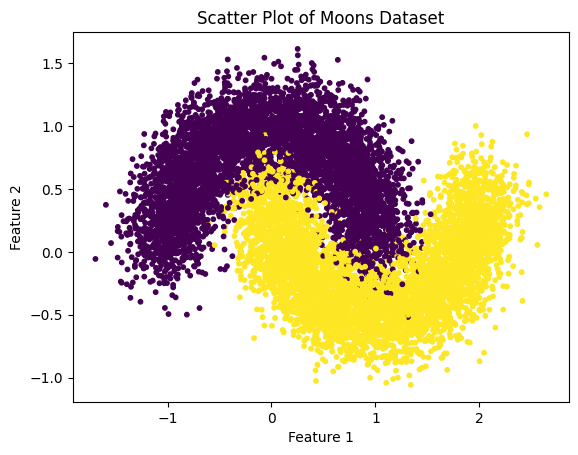

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Moons Dataset")
plt.show()

In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000, random_state = 42)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=42)

In [54]:
mlp.predict(X_val)
y_pred_val = mlp.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))


Validation set classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       770
           1       0.95      0.98      0.97       730

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



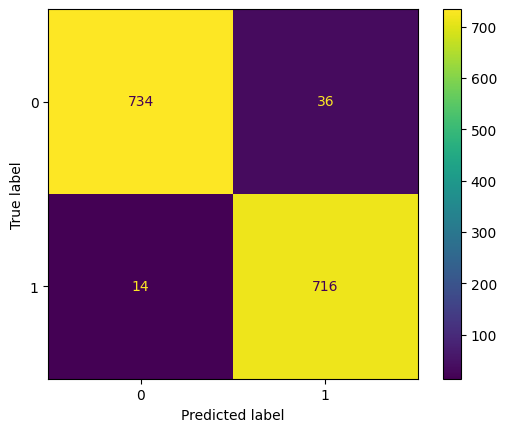

In [55]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)
plt.show()


In [56]:
# Visualization: decision boundary
def plot_decision_boundary(model, X, y, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title("MLPClassifier Decision Boundary")




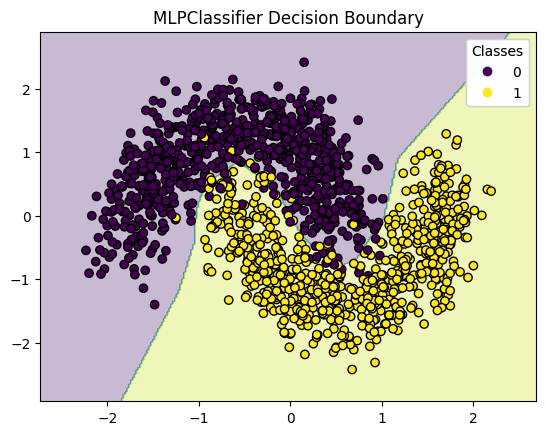

In [57]:
fig, ax = plt.subplots()
plot_decision_boundary(mlp, X_test, y_test, ax)
plt.show()

## MNIST Data

In [61]:
mnist = fetch_openml('mnist_784', version = 1, parser = 'auto')
X, y = mnist['data'], mnist['target']

In [72]:
print('Max val: ', X.values.max())
print('Min val: ', X.values.min())

Max val:  255
Min val:  0


In [73]:
X = X / 255.0  # Normalize pixel values to [0, 1]

In [75]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

# Split of validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [77]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
mlp.fit(X_train, y_train)

c:\Users\rhodes8\AppData\Local\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=42)

In [79]:
mlp.predict(X_val)
y_pred_val = mlp.predict(X_val)

print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))

Validation set classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.99      0.98      0.98      1322
           2       0.96      0.97      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.94      0.99      0.97      1176
           5       0.98      0.95      0.96      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.97      0.97      1299
           8       0.94      0.97      0.95      1160
           9       0.97      0.95      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



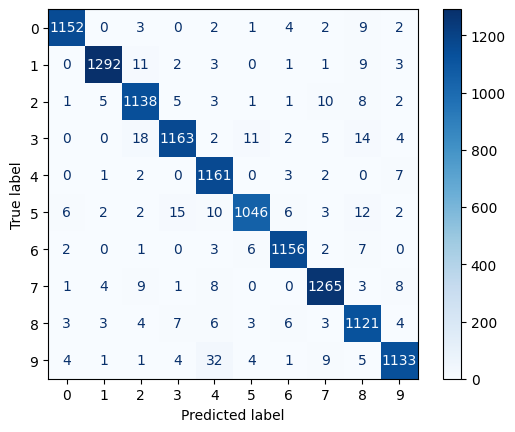

In [80]:
cm = ConfusionMatrixDisplay.from_estimator(mlp, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

In [84]:
y_proba_val.round(3)

array([[0.   , 0.   , 0.   , ..., 0.997, 0.   , 0.003],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.001, 0.914],
       [0.001, 0.   , 0.   , ..., 0.989, 0.   , 0.009],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ]])

In [89]:
# Get predicted probabilities for the validation set
y_proba_val = mlp.predict_proba(X_val)

# Identify misclassified points
misclassified_indices = np.where(y_val != y_pred_val)[0]

# Calculate discrepancies for misclassified points
discrepancies = np.abs(y_proba_val[misclassified_indices, y_val.iloc[misclassified_indices].astype(int)] - 
                       y_proba_val[misclassified_indices, y_pred_val[misclassified_indices].astype(int)])

# Get indices of misclassified points with the highest discrepancies
top_discrepancy_indices = misclassified_indices[np.argsort(-discrepancies)[:5]]

# Display predicted probabilities and true y values for these points
print("Predicted probabilities for misclassified points with highest discrepancies:")
print(y_proba_val[top_discrepancy_indices].round(3))
print("\nTrue y values for these points:")
print(y_val.iloc[top_discrepancy_indices].values)

Predicted probabilities for misclassified points with highest discrepancies:
[[0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.001 0.    0.999 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.998 0.001 0.    0.001 0.   ]
 [0.    0.    0.    0.    0.998 0.    0.    0.    0.    0.002]
 [0.    0.    0.    0.    0.    0.005 0.    0.    0.995 0.   ]]

True y values for these points:
['3', '3', '8', '9', '6']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


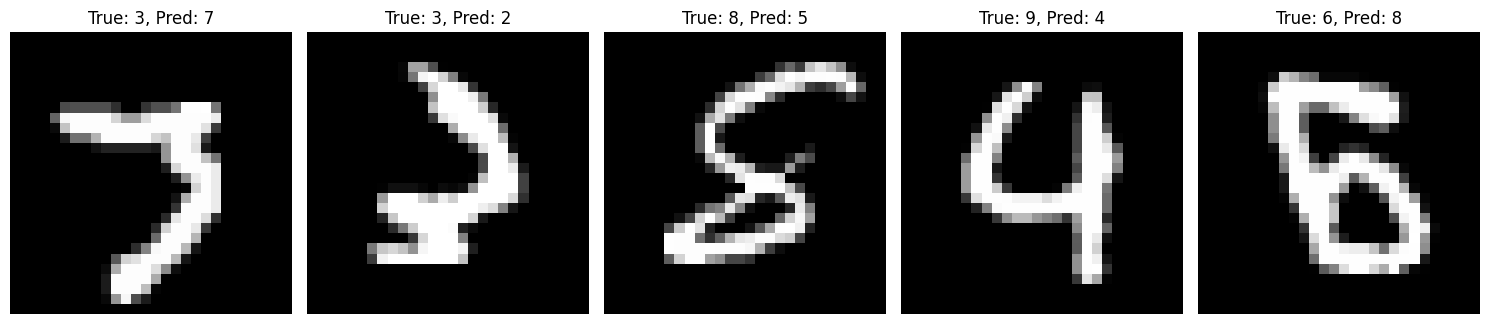

In [91]:
fig, axes = plt.subplots(1, len(top_discrepancy_indices), figsize=(15, 5))

for i, idx in enumerate(top_discrepancy_indices):
    ax = axes[i]
    image = X_val.iloc[idx].values.reshape(28, 28)  # Reshape the flattened image to 28x28
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {y_val.iloc[idx]}, Pred: {y_pred_val[idx]}")

plt.tight_layout()
plt.show()

In [ ]:
## CNN Using Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    # Convolutional layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected layer 1
    Dense(units=128, activation='relu'),

    # Output layer
    Dense(units=10, activation='softmax')  # 10 classes for classification
])

# Print the model summary
model.summary()


In [ ]:
def train_keras_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=10):
    """
    Train a Keras model with training and validation data.

    Parameters:
    - model: Keras model to be trained.
    - X_train: Training data features.
    - y_train: Training data labels.
    - X_val: Validation data features.
    - y_val: Validation data labels.
    - batch_size: Number of samples per gradient update.
    - epochs: Number of epochs to train the model.

    Returns:
    - history: Training history object containing loss and accuracy metrics.
    """
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)
    return history
